# **Capitulo 2 – Training Models**

# Setup

In [1]:
import numpy as np

Como hicimos en Notebook anteriores, vamos a definir los tamaños de fuente por defecto para que las figuras queden más bonitas:

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Y vamos a crear la carpeta `images/training_linear_models` (si no existe ya), y definir la función `save_fig()` que se utiliza a través de este cuaderno para guardar las figuras en alta resolución para el libro:

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Regresión polinómica

¿Y si los datos son más complejos que una línea recta? Sorprendentemente, puede utilizar un modelo lineal para ajustar datos no lineales. Una forma sencilla de hacerlo es añadir potencias de cada característica como nuevas características y, a continuación, entrenar un modelo lineal en este conjunto ampliado de características. Esta técnica se denomina regresión polinómica.

Veamos un ejemplo. Primero, generaremos algunos datos no lineales, basados en una simple ecuación cuadrática, es decir, una ecuación de la forma $ y = ax^2 + bx + c $, más algo de ruido:

In [5]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

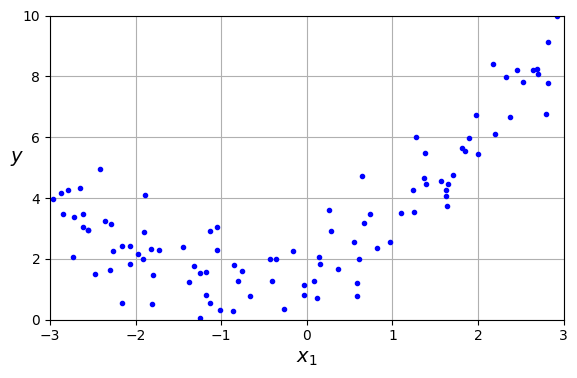

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

Está claro que una línea recta nunca se ajustará correctamente a estos datos. Así que vamos a utilizar la clase PolynomialFeatures de Scikit-Learn para transformar nuestros datos de entrenamiento, añadiendo el cuadrado (polinomio de segundo grado) de cada característica en el conjunto de entrenamiento como una nueva característica (en este caso sólo hay una característica):


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False) #(hacemos de grado 2, sin incluir sesgo )
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [8]:
X_poly[0] #(ahora tenemos dos columnitas, por grado 2, estamos agregando complejidad al modelo)

array([-0.75275929,  0.56664654])

X_poly contiene ahora la característica original de X más el cuadrado de esta característica. Ahora podemos ajustar un modelo de regresión lineal a estos datos de entrenamiento ampliados:

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

El importante es el primero, el segundo es solo por mejorar el modelo pero no le doy importancia

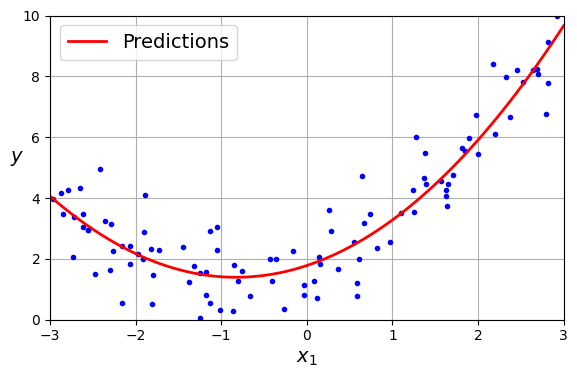

In [12]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

No está mal: el modelo estima $ y = 0.56x1^2 + 0.93x1 + 1.78 $ cuando de hecho la función original era $ y = 0.5x1^2 + 1.0x1 + 2.0 $ más ruido Gaussiano. 

Ten en cuenta que cuando hay múltiples características, la regresión polinómica es capaz de encontrar relaciones entre características, lo cual es algo que un modelo de regresión lineal simple no puede hacer. Esto es posible gracias a que PolynomialFeatures también agrega todas las combinaciones de características hasta el grado dado. Por ejemplo, si hubiera dos características a y b, PolynomialFeatures con degree=3 no solo agregaría las características a², a³, b² y b³, sino también las combinaciones ab, a²b y ab².


¡PolynomialFeatures(degree=d) transforma una matriz que contiene n características en una matriz que contiene $(n + d)! / d!n!$ es el factorial de n, igual a $1 × 2 × 3 × ⋯ × n$. ¡Cuidado con la explosión combinatoria del número de características!